In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

df= pd.read_csv('Online_Shop Customer_Sales_Data.csv')
df.head()

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher
0,504308,53,0,45.3,2,22.06.21,24.915,1,885,0,0,0
1,504309,18,1,36.2,3,10.12.21,2.896,2,656,0,0,1
2,504310,52,1,10.6,1,14.03.21,10.600,0,761,0,1,0
3,504311,29,0,54.1,5,25.10.21,43.280,1,906,0,1,0
4,504312,21,1,56.9,1,14.09.21,56.900,1,605,0,1,0


In [2]:
columns = list(df.columns)
columns

['Customer_id',
 'Age',
 'Gender',
 'Revenue_Total',
 'N_Purchases',
 'Purchase_DATE',
 'Purchase_VALUE',
 'Pay_Method',
 'Time_Spent',
 'Browser',
 'Newsletter',
 'Voucher']

In [3]:
print(df.isnull().mean())

Customer_id       0.0
Age               0.0
Gender            0.0
Revenue_Total     0.0
N_Purchases       0.0
Purchase_DATE     0.0
Purchase_VALUE    0.0
Pay_Method        0.0
Time_Spent        0.0
Browser           0.0
Newsletter        0.0
Voucher           0.0
dtype: float64


In [4]:
df.describe()

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher
count,65796.000000,65796.000000,65796.000000,65796.000000,65796.000000,65796.000000,65796.000000,65796.000000,65796.000000,65796.000000,65796.000000
mean,537205.500000,39.592696,0.671348,27.732935,3.992477,15.968699,1.308651,598.925603,0.630935,0.151027,0.250258
std,18993.813493,13.825466,0.469727,14.941878,2.004370,13.229295,1.081959,277.833635,0.996407,0.358078,0.433165
min,504308.000000,16.000000,0.000000,0.500000,1.000000,0.005000,0.000000,120.000000,0.000000,0.000000,0.000000
25%,520756.750000,28.000000,0.000000,15.300000,2.000000,4.819750,0.000000,358.000000,0.000000,0.000000,0.000000
50%,537205.500000,40.000000,1.000000,30.100000,4.000000,12.640000,1.000000,598.000000,0.000000,0.000000,0.000000
75%,553654.250000,51.000000,1.000000,37.600000,6.000000,24.752000,2.000000,840.000000,1.000000,0.000000,1.000000
max,570103.000000,63.000000,1.000000,59.900000,7.000000,59.900000,3.000000,1080.000000,3.000000,1.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65796 entries, 0 to 65795
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Customer_id     65796 non-null  int64  
 1   Age             65796 non-null  int64  
 2   Gender          65796 non-null  int64  
 3   Revenue_Total   65796 non-null  float64
 4   N_Purchases     65796 non-null  int64  
 5   Purchase_DATE   65796 non-null  object 
 6   Purchase_VALUE  65796 non-null  float64
 7   Pay_Method      65796 non-null  int64  
 8   Time_Spent      65796 non-null  int64  
 9   Browser         65796 non-null  int64  
 10  Newsletter      65796 non-null  int64  
 11  Voucher         65796 non-null  int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 6.0+ MB


In [6]:
df = df.drop('Customer_id', axis=1)

In [7]:
df

,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher
0,53,0,45.3,2,22.06.21,24.915,1,885,0,0,0
1,18,1,36.2,3,10.12.21,2.896,2,656,0,0,1
2,52,1,10.6,1,14.03.21,10.600,0,761,0,1,0
3,29,0,54.1,5,25.10.21,43.280,1,906,0,1,0
4,21,1,56.9,1,14.09.21,56.900,1,605,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
65791,30,1,10.9,4,15.02.21,6.213,1,894,0,0,0
65792,33,0,29.3,1,05.02.21,29.300,0,722,0,0,0
65793,50,0,25.4,5,29.10.21,23.114,3,424,0,0,0
65794,56,0,29.2,1,09.12.21,29.200,3,731,0,0,0


In [8]:
df['Month'] = df['Purchase_DATE'].str.split('.').str[1].astype(int)
df['Year'] = df['Purchase_DATE'].str.split('.').str[2].astype(int)

In [9]:
df = df.drop('Purchase_DATE', axis=1)

In [10]:
df

,Age,Gender,Revenue_Total,N_Purchases,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher,Month,Year
0,53,0,45.3,2,24.915,1,885,0,0,0,6,21
1,18,1,36.2,3,2.896,2,656,0,0,1,12,21
2,52,1,10.6,1,10.600,0,761,0,1,0,3,21
3,29,0,54.1,5,43.280,1,906,0,1,0,10,21
4,21,1,56.9,1,56.900,1,605,0,1,0,9,21
...,...,...,...,...,...,...,...,...,...,...,...,...
65791,30,1,10.9,4,6.213,1,894,0,0,0,2,21
65792,33,0,29.3,1,29.300,0,722,0,0,0,2,21
65793,50,0,25.4,5,23.114,3,424,0,0,0,10,21
65794,56,0,29.2,1,29.200,3,731,0,0,0,12,21


Question: Which gender makes the most purchases?

In [11]:
df.Gender.value_counts()

1    44172
0    21624
Name: Gender, dtype: int64

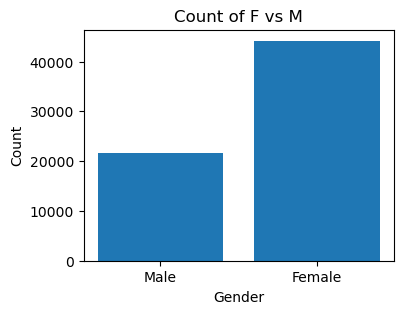

In [12]:
counts = df.Gender.value_counts()
plt.figure(figsize=(4, 3))
plt.bar(counts.index, counts.values)
plt.xticks([0, 1], ['Male', 'Female']) 
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of F vs M')
plt.show()

Finding: Women make significantly more purchases than men on this website.

Question: What are some distributions?

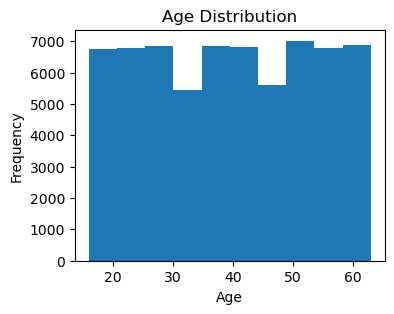

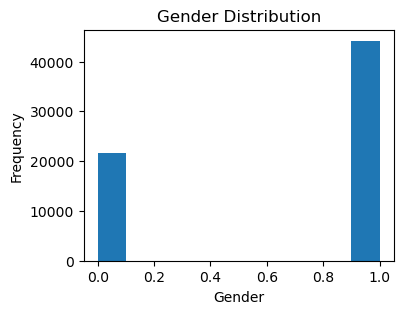

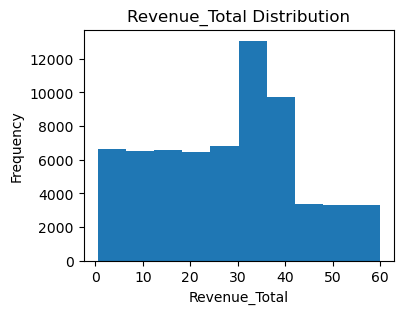

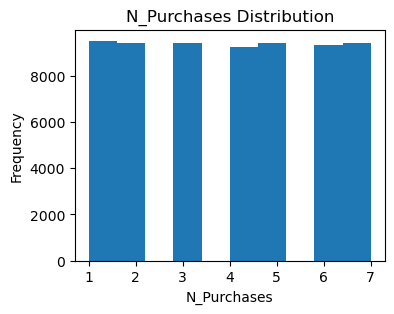

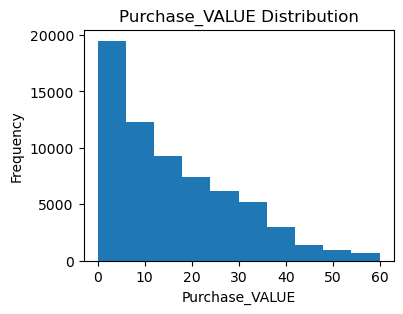

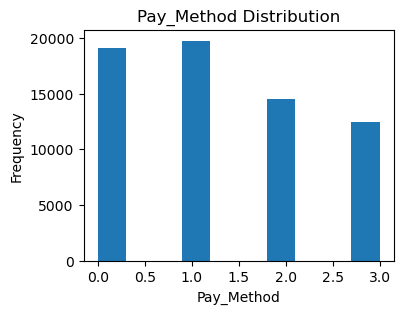

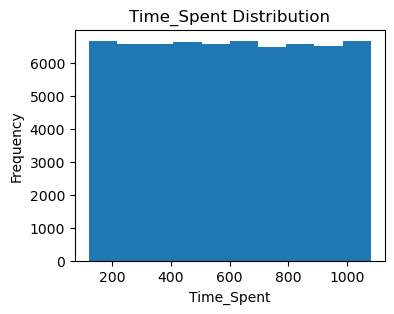

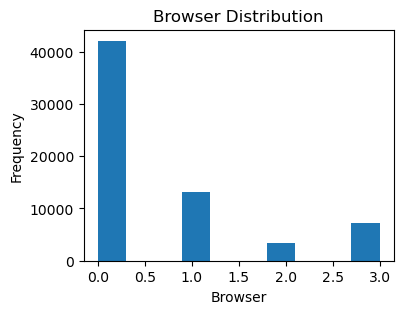

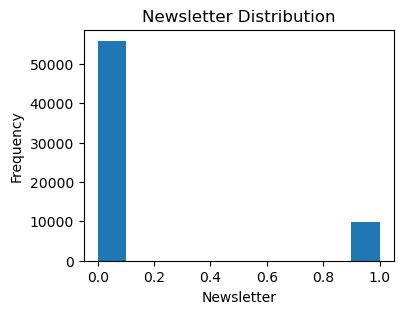

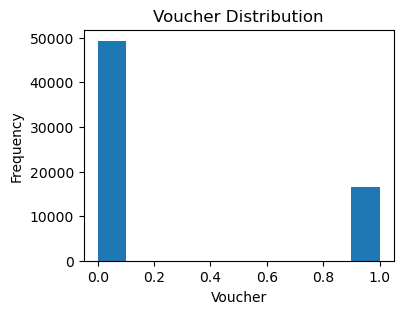

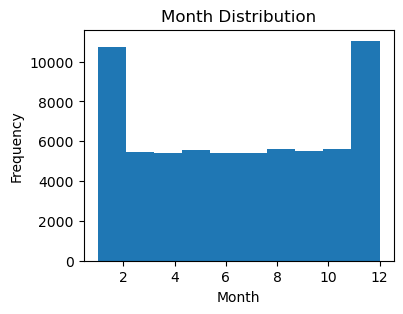

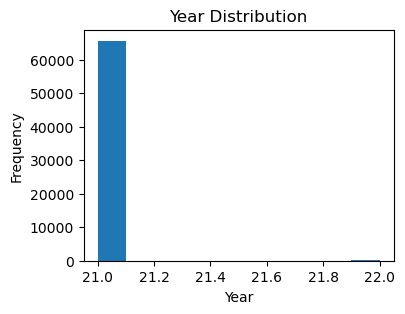

In [13]:
for feature in df.columns:
    plt.figure(figsize=(4, 3))
    plt.hist(df[feature])
    plt.title(f"{feature} Distribution")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show() 

- The age is range is pretty evenly dispursed from about 20 to about 60 y/o.
- There are far more greater females who make purchases.
- Total revenue (sales) per person is generally under 30, however, there are a lot of people who have made 30-40 sales. Fewer people sell more than 40.
- Number of purchases are evenly distributed.
- People tend to spend on more affordable products, especially under the 10 euro range.
- Most people like to pay with their Credit Cards, followed by digital wallets.
- The time spent on the website is pretty evenly dispursed from 200 to 1000 seconds.
- Most people use Chrome as their browser of choice.
- Most customers are not subscribed to the Newsletter.
- Most customers do not use a voucher when making a purchase.
- As suspected, seasonality plays a huge role as the holiday season makes the most amount of sales.

Question: Does the revenue increase during the holidays as well?

In [14]:
monthly_revenue = df.groupby('Month')['Revenue_Total'].sum()

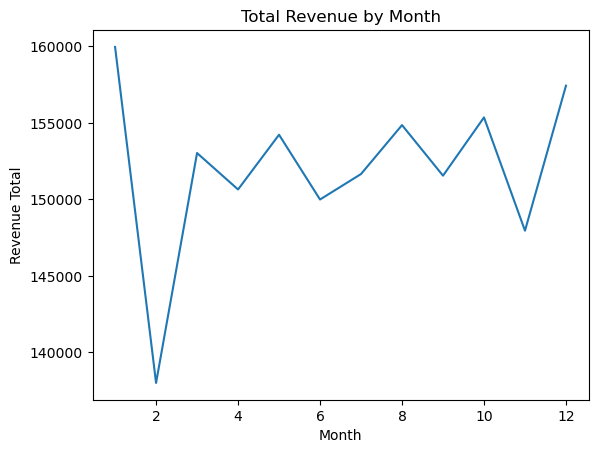

In [15]:
plt.plot(monthly_revenue)
plt.xlabel('Month')
plt.ylabel('Revenue Total')
plt.title('Total Revenue by Month')
plt.show()

Answer: Seems like the revenue increases during the holidays and shortly after, before plunging down in Feburary.

Because of the revenue increase, does the time spent on the site increase during the holiday season as well?

In [16]:
monthly_timespent = df.groupby('Month')['Time_Spent'].sum()

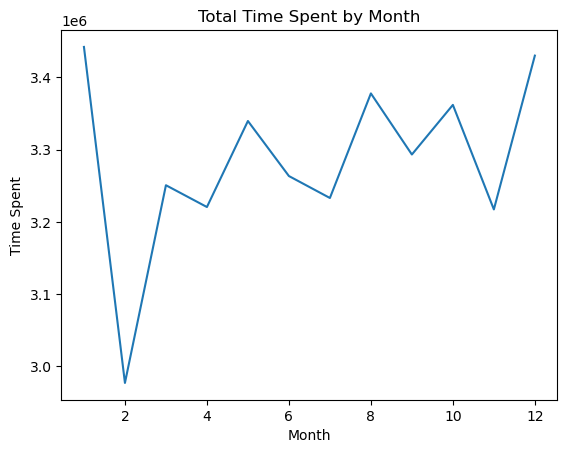

In [17]:
plt.plot(monthly_timespent)
plt.xlabel('Month')
plt.ylabel('Time Spent')
plt.title('Total Time Spent by Month')
plt.show()

Finding: Yes, time spent on the website does increase during the holiday season.

Browser Plot

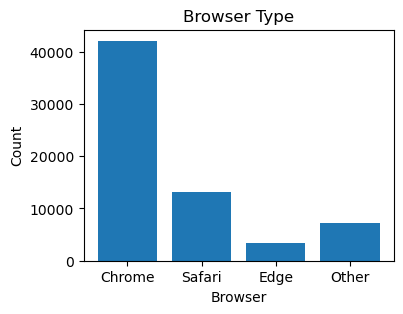

In [19]:
browser_counts = df.Browser.value_counts()
plt.figure(figsize=(4, 3))
plt.bar(browser_counts.index, browser_counts.values)
plt.xticks([0, 1, 2, 3], ['Chrome', 'Safari', 'Edge', 'Other'])  
plt.xlabel('Browser')
plt.ylabel('Count')
plt.title('Browser Type')
plt.show()

Answer: Most people use Chrome when visiting the online store.

In [20]:
df.Voucher.value_counts()

0    49330
1    16466
Name: Voucher, dtype: int64

Most people do not use a voucher, but of those who do, are there any particular trends in usage?

In [21]:
voucher_by_month = df.groupby('Month')['Voucher'].sum()

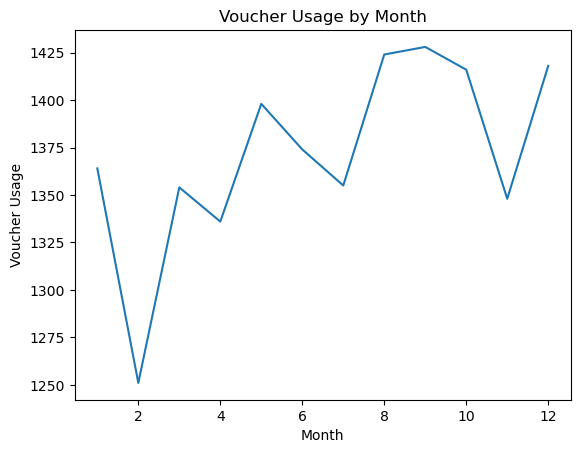

In [22]:
plt.plot(voucher_by_month)
plt.xlabel('Month')
plt.ylabel('Voucher Usage')
plt.title('Voucher Usage by Month')
plt.show()

Do we need to look at trends by year?

In [23]:
df.Year.value_counts()

21    65619
22      177
Name: Year, dtype: int64

What is the average purchase value?

In [24]:
df.Purchase_VALUE.mean()

15.968699039455288

Let's look at the distribution of high purchase customers.

In [25]:
high_value_cust = df[df['Purchase_VALUE'] > 16]
high_value_cust.head()

,Age,Gender,Revenue_Total,N_Purchases,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher,Month,Year
0,53,0,45.3,2,24.915,1,885,0,0,0,6,21
3,29,0,54.1,5,43.280,1,906,0,1,0,10,21
4,21,1,56.9,1,56.900,1,605,0,1,0,9,21
10,26,0,36.5,5,31.390,2,1029,0,0,1,12,21
16,22,0,39.7,3,30.569,2,931,3,0,0,2,21


Are high purchase customers older or younger?

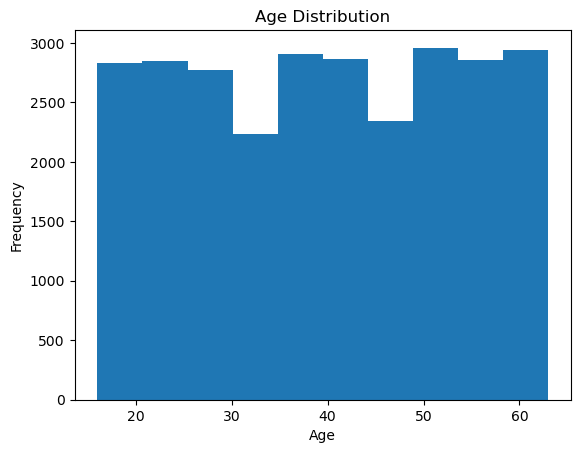

In [37]:
plt.hist(high_value_cust['Age'])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Are high purchase customers generally male or female?

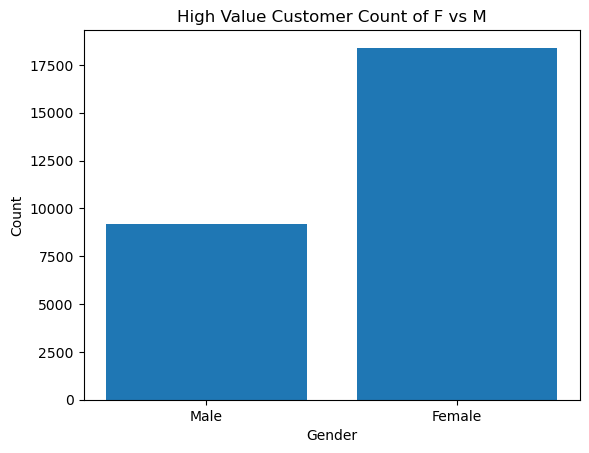

In [38]:
high_value_cust_gender_counts = high_value_cust.Gender.value_counts()
plt.bar(high_value_cust_gender_counts.index, high_value_cust_gender_counts.values)
plt.xticks([0, 1], ['Male', 'Female']) 
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('High Value Customer Count of F vs M')
plt.show()

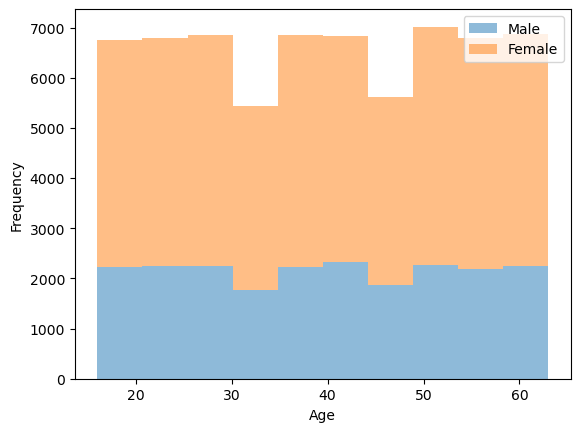

In [39]:
df_male = df[df['Gender'] == 0]
df_female = df[df['Gender'] == 1]

plt.hist([df_male['Age'], df_female['Age']], alpha=0.5, label=['Male', 'Female'], stacked=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

plt.show()

Does payment method affect the purchase value?

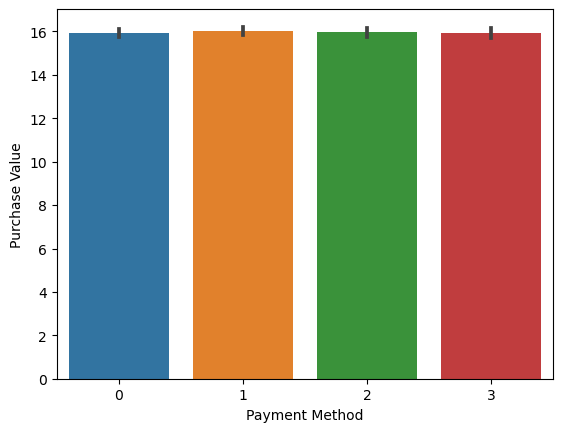

In [29]:
import seaborn as sns
sns.barplot(x='Pay_Method', y='Purchase_VALUE', data=df)
plt.xlabel('Payment Method')
plt.ylabel('Purchase Value')
plt.show()

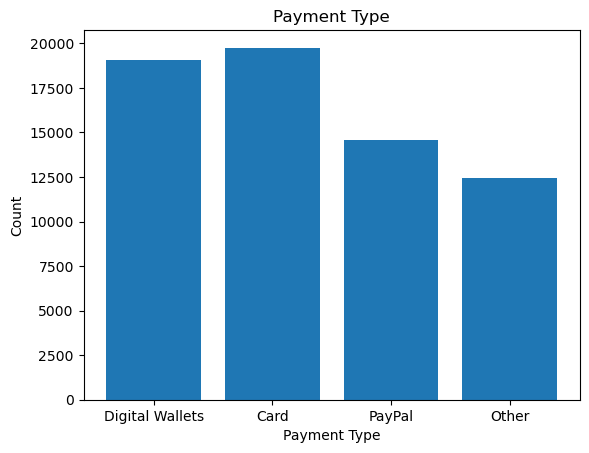

In [30]:
pay_meth = df.Pay_Method.value_counts()
plt.bar(pay_meth.index, pay_meth.values)
plt.xticks([0, 1, 2, 3], ['Digital Wallets', 'Card', 'PayPal', 'Other'])  
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.title('Payment Type')
plt.show()

Is there correlation between time spent on site and purchase value?

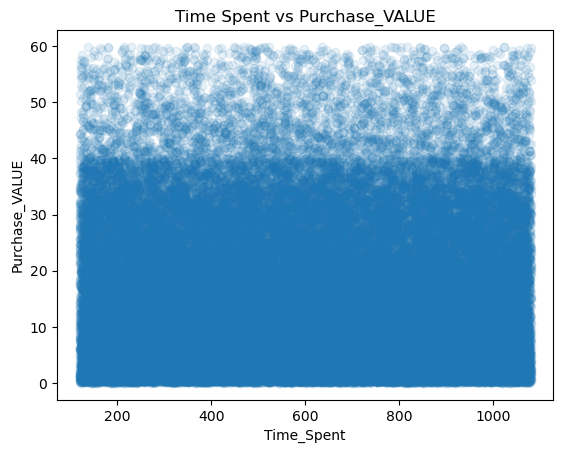

In [31]:
plt.scatter(df['Time_Spent'], df['Purchase_VALUE'], alpha=0.1)
plt.xlabel('Time_Spent')
plt.ylabel('Purchase_VALUE')
plt.title('Time Spent vs Purchase_VALUE')
plt.show()

Is there correlation between time spent on site vs revenue?

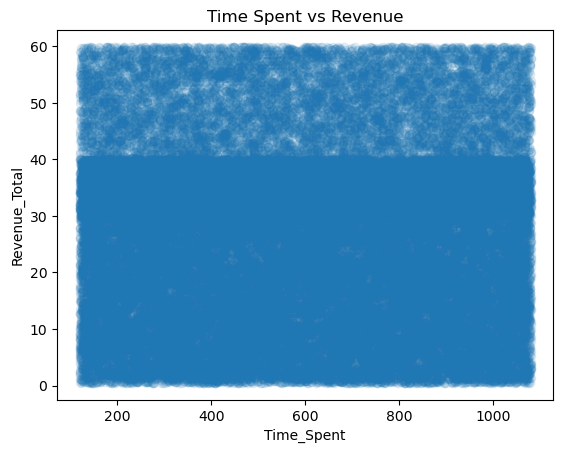

In [32]:
plt.scatter(df['Time_Spent'], df['Revenue_Total'], alpha=0.1)
plt.xlabel('Time_Spent')
plt.ylabel('Revenue_Total')
plt.title('Time Spent vs Revenue')
plt.show()

Let's look at revenue distribution throughout the months in a bar plot.

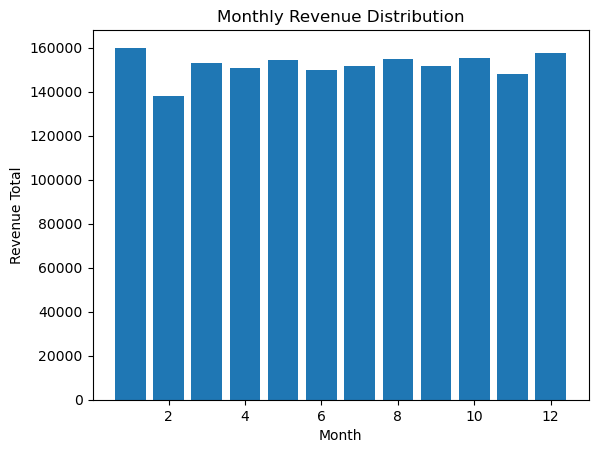

In [33]:
monthly_revenue = df.groupby('Month')['Revenue_Total'].sum()
plt.bar(monthly_revenue.index, monthly_revenue.values)
plt.xlabel('Month')
plt.ylabel('Revenue Total')
plt.title('Monthly Revenue Distribution')
plt.show()

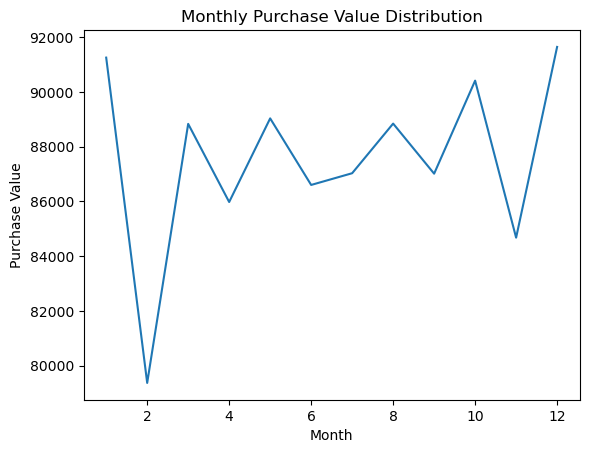

In [35]:
monthly_purchase_val = df.groupby('Month')['Purchase_VALUE'].sum()
plt.plot(monthly_purchase_val.index, monthly_purchase_val.values)
plt.xlabel('Month')
plt.ylabel('Purchase Value')
plt.title('Monthly Purchase Value Distribution')
plt.show()

Summary: Generally speaking, the average user is most likely to purchase an item around 16 euro. They are likely to be female and can be any age. They'll most likely be using a Chrome browser and be paying with a credit card or digital wallet. They will most likely be doing holiday shopping or taking advantage of the after holiday discounts. They will most likely not be a newsletter subscriber nor have a voucher to use.